# Modeling

In [45]:
from datetime import datetime
start_time = datetime.now()

# Libraries to load
# !pip install lightgbm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:00.001334


In [2]:
%%time
vars = pd.read_csv('vars_final.csv')
print(vars.shape)
vars.head()

(96397, 22)
CPU times: user 140 ms, sys: 27.7 ms, total: 168 ms
Wall time: 177 ms


,card_zip_total_3,card_state_max_30,card_zip_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,merch_zip_avg_0,merch_dow_avg_3,Merchnum_avg_0,merch_dow_avg_1,...,merch_state_avg_0,Merchnum_avg_1,card_merch_avg_30,card_merch_max_30,card_zip_avg_1,card_merch_avg_3,merch_state_avg_1,card_zip_avg_0,Recnum,Fraud
0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,1,0
1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,2,0
2,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,3,0
3,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,4,0
4,7.24,3.62,7.24,7.24,7.24,7.24,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,5,0


In [3]:
final_vars = pd.read_csv('final_vars_list.csv')
final_vars

,variable name
0,card_zip_total_3
1,card_state_max_30
2,card_zip_total_14
3,card_merch_total_0
4,card_state_total_0
5,card_zip_total_0
6,merch_zip_avg_0
7,merch_dow_avg_3
8,Merchnum_avg_0
9,merch_dow_avg_1


In [4]:
numvars = 15   # 5, 10, 15, 20
final_vars_list = ['Recnum','Fraud']
for i in range(numvars):
    final_vars_list.append(final_vars.iloc[i]['variable name'])
    
final_vars_list

['Recnum',
 'Fraud',
 'card_zip_total_3',
 'card_state_max_30',
 'card_zip_total_14',
 'card_merch_total_0',
 'card_state_total_0',
 'card_zip_total_0',
 'merch_zip_avg_0',
 'merch_dow_avg_3',
 'Merchnum_avg_0',
 'merch_dow_avg_1',
 'merch_dow_avg_0',
 'merch_zip_avg_1',
 'merch_state_avg_0',
 'Merchnum_avg_1',
 'card_merch_avg_30']

In [5]:
vars = vars.filter(final_vars_list,axis=1)
vars.head()

,Recnum,Fraud,card_zip_total_3,card_state_max_30,card_zip_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,merch_zip_avg_0,merch_dow_avg_3,Merchnum_avg_0,merch_dow_avg_1,merch_dow_avg_0,merch_zip_avg_1,merch_state_avg_0,Merchnum_avg_1,card_merch_avg_30
0,1,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,4,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
4,5,0,7.24,3.62,7.24,7.24,7.24,7.24,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62


In [6]:
# use this to cap variables. For some problems it helps
Clip = 10

In [7]:
# vars.rename(columns={'fraud_label':'Fraud'},inplace=True)

In [7]:
vars['Fraud'].sum()

1059

In [8]:
vars.head(10)

,Recnum,Fraud,card_zip_total_3,card_state_max_30,card_zip_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,merch_zip_avg_0,merch_dow_avg_3,Merchnum_avg_0,merch_dow_avg_1,merch_dow_avg_0,merch_zip_avg_1,merch_state_avg_0,Merchnum_avg_1,card_merch_avg_30
0,1,0,3.62,3.62,3.62,3.62,3.62,3.62,3.620000,3.620000,3.620000,3.620000,3.620000,3.620000,3.620000,3.620000,3.62
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.420000,31.420000,31.420000,31.420000,31.420000,31.420000,31.420000,31.420000,31.42
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.490000,178.490000,178.490000,178.490000,178.490000,178.490000,178.490000,178.490000,178.49
3,4,0,3.62,3.62,3.62,3.62,3.62,3.62,3.620000,3.620000,3.620000,3.620000,3.620000,3.620000,3.620000,3.620000,3.62
4,5,0,7.24,3.62,7.24,7.24,7.24,7.24,3.620000,3.620000,3.620000,3.620000,3.620000,3.620000,3.620000,3.620000,3.62
5,6,0,3.67,3.67,3.67,3.67,3.67,3.67,3.632500,3.632500,3.632500,3.632500,3.632500,3.632500,3.632500,3.632500,3.67
6,7,0,3.62,3.62,3.62,3.62,3.62,3.62,3.630000,3.630000,3.630000,3.630000,3.630000,3.630000,3.630000,3.630000,3.62
7,8,0,230.32,230.32,230.32,230.32,230.32,230.32,230.320000,230.320000,230.320000,230.320000,230.320000,230.320000,230.320000,230.320000,230.32
8,9,0,62.11,62.11,62.11,62.11,62.11,62.11,62.110000,62.110000,62.110000,62.110000,62.110000,62.110000,62.110000,62.110000,62.11
9,10,0,10.86,3.62,10.86,10.86,10.86,10.86,3.628333,3.628333,3.628333,3.628333,3.628333,3.628333,3.628333,3.628333,3.62


In [9]:
vars.shape

(96397, 17)

In [10]:
vars.describe()

,Recnum,Fraud,card_zip_total_3,card_state_max_30,card_zip_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,merch_zip_avg_0,merch_dow_avg_3,Merchnum_avg_0,merch_dow_avg_1,merch_dow_avg_0,merch_zip_avg_1,merch_state_avg_0,Merchnum_avg_1,card_merch_avg_30
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,48365.481820,0.010986,642.134217,708.830517,806.656625,529.059538,553.959547,531.796481,395.318386,395.555635,395.555635,395.555635,395.555635,397.298177,395.413364,397.964184,404.220029
std,27945.003883,0.104236,4066.803407,1298.414384,4186.923501,2622.052105,2640.513453,2623.087903,759.254251,743.275734,743.275734,743.275734,743.275734,748.349808,759.395837,731.741737,787.939820
min,1.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,24154.000000,0.000000,58.350000,87.030000,85.000000,46.620000,49.120000,47.330000,39.950000,40.010000,40.010000,40.010000,40.010000,44.750000,39.950000,45.348000,42.473333
50%,48365.000000,0.000000,185.770000,325.540000,257.000000,159.400000,169.000000,160.940000,159.055000,163.640000,163.640000,163.640000,163.640000,175.000000,159.000000,180.910000,165.485000
75%,72578.000000,0.000000,556.940000,919.010000,718.640000,494.000000,514.680000,495.900000,452.310000,455.800000,455.800000,455.800000,455.800000,464.830000,452.000000,470.000000,463.380000
max,96753.000000,1.000000,306633.410000,47900.000000,306633.410000,217467.180000,217467.180000,217467.180000,28392.840000,26910.000000,26910.000000,26910.000000,26910.000000,28392.840000,28392.840000,26910.000000,28392.840000


In [11]:
record_save = vars['Recnum']
Y_save = pd.DataFrame(vars.loc[:,'Fraud'])
Y_save.head()

,Fraud
0,0
1,0
2,0
3,0
4,0


## Scale and truncate field values

In [12]:
X_no_scaling = vars.drop(columns = ['Recnum','Fraud'])
X_no_scaling.describe()

,card_zip_total_3,card_state_max_30,card_zip_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,merch_zip_avg_0,merch_dow_avg_3,Merchnum_avg_0,merch_dow_avg_1,merch_dow_avg_0,merch_zip_avg_1,merch_state_avg_0,Merchnum_avg_1,card_merch_avg_30
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,642.134217,708.830517,806.656625,529.059538,553.959547,531.796481,395.318386,395.555635,395.555635,395.555635,395.555635,397.298177,395.413364,397.964184,404.220029
std,4066.803407,1298.414384,4186.923501,2622.052105,2640.513453,2623.087903,759.254251,743.275734,743.275734,743.275734,743.275734,748.349808,759.395837,731.741737,787.939820
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,58.350000,87.030000,85.000000,46.620000,49.120000,47.330000,39.950000,40.010000,40.010000,40.010000,40.010000,44.750000,39.950000,45.348000,42.473333
50%,185.770000,325.540000,257.000000,159.400000,169.000000,160.940000,159.055000,163.640000,163.640000,163.640000,163.640000,175.000000,159.000000,180.910000,165.485000
75%,556.940000,919.010000,718.640000,494.000000,514.680000,495.900000,452.310000,455.800000,455.800000,455.800000,455.800000,464.830000,452.000000,470.000000,463.380000
max,306633.410000,47900.000000,306633.410000,217467.180000,217467.180000,217467.180000,28392.840000,26910.000000,26910.000000,26910.000000,26910.000000,28392.840000,28392.840000,26910.000000,28392.840000


In [13]:
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()

In [14]:
# push in any outlier values
cols = X.columns
X.loc[:,cols] = X[cols].clip(upper=Clip)
X.loc[:,cols] = X[cols].clip(lower=-1*Clip)
# X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
X.describe()

,card_zip_total_3,card_state_max_30,card_zip_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,merch_zip_avg_0,merch_dow_avg_3,Merchnum_avg_0,merch_dow_avg_1,merch_dow_avg_0,merch_zip_avg_1,merch_state_avg_0,Merchnum_avg_1,card_merch_avg_30
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,-0.012607,-0.010834,-0.012245,-0.011778,-0.011640,-0.011770,-0.007430,-0.007034,-0.007034,-0.007034,-0.007034,-0.007672,-0.007396,-0.007271,-0.008218
std,0.448265,0.821922,0.496200,0.482831,0.495104,0.483555,0.859903,0.871973,0.871973,0.871973,0.871973,0.853230,0.860437,0.865505,0.846484
min,-0.157894,-0.545912,-0.192659,-0.201769,-0.209789,-0.202733,-0.520654,-0.532165,-0.532165,-0.532165,-0.532165,-0.530886,-0.520682,-0.543845,-0.512996
25%,-0.143549,-0.478892,-0.172360,-0.183993,-0.191190,-0.184693,-0.468049,-0.478350,-0.478350,-0.478350,-0.478350,-0.471101,-0.468087,-0.481886,-0.459104
50%,-0.112217,-0.295199,-0.131279,-0.140981,-0.145790,-0.141382,-0.311178,-0.312018,-0.312018,-0.312018,-0.312018,-0.297051,-0.311318,-0.296627,-0.302986
75%,-0.020949,0.161874,-0.021022,-0.013371,-0.014876,-0.013685,0.075063,0.081053,0.081053,0.081053,0.081053,0.090241,0.074515,0.098444,0.075082
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [15]:
# separate data into modeling (traintest) and out of time
oot_recnum = 84300
X_trntst = X[0:oot_recnum] 
Y_trntst = Y_save[0:oot_recnum]
X_oot = X[oot_recnum:]
Y_oot = Y_save[oot_recnum:]

In [16]:
niter = 0
nitermax = 10
FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
X_oot_orig = X_oot.copy()
pd.options.mode.chained_assignment = None  # default='warn'

## Models. You can comment out any of these cells and just explore one model type. You can also just rerun that single cell multiple times as you explore different model hyperparameters.

In [28]:
##### %%time
# Logistic regression

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = LogisticRegression(penalty = 'l1', solver = 'saga', C = 0.1, max_iter = 3000) # C = 1, l1_ratio = 0.2
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.5990180032733224 0.6264591439688716 0.3407821229050279
1 0.5891980360065466 0.5797665369649806 0.3463687150837989
2 0.6213114754098361 0.5813953488372093 0.3463687150837989
3 0.5959595959595959 0.6094890510948905 0.3463687150837989
4 0.6174957118353345 0.5473684210526316 0.35195530726256985
5 0.6032786885245902 0.5465116279069767 0.35195530726256985
6 0.5896147403685092 0.6273062730627307 0.3407821229050279
7 0.610223642172524 0.5909090909090909 0.3463687150837989
8 0.5852459016393443 0.6124031007751938 0.3407821229050279
9 0.6063651591289783 0.5830258302583026 0.3463687150837989
trn    0.601771
tst    0.590463
oot    0.345810
dtype: float64


In [35]:
%%time
# Single DT

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = DecisionTreeClassifier(criterion = 'entropy', 8max_depth = 20, min_samples_split = 200,\
                                   min_samples_leaf = 60) #  splitter = 'best',
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.8077544426494345 0.6907630522088354 0.49162011173184356
1 0.8033057851239669 0.6958174904942965 0.5195530726256983
2 0.8197573656845754 0.7079037800687286 0.5139664804469274
3 0.8069883527454242 0.7378277153558053 0.49162011173184356
4 0.7893030794165316 0.7450199203187251 0.49162011173184356
5 0.805414551607445 0.703971119133574 0.4860335195530726
6 0.8198653198653199 0.6715328467153284 0.5027932960893855
7 0.8186356073211315 0.7378277153558053 0.5307262569832403
8 0.8196994991652755 0.7137546468401487 0.46368715083798884
9 0.7783094098883573 0.7759336099585062 0.5418994413407822
trn    0.806903
tst    0.718035
oot    0.503352
dtype: float64
CPU times: user 9.48 s, sys: 83.3 ms, total: 9.57 s
Wall time: 9.59 s


In [113]:
%%time
# RF

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = RandomForestClassifier(n_estimators = 100, max_depth = None, min_samples_split = 100, \
                                   min_samples_leaf = 100, max_features = None) # criterion = 'entropy', 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted'] = predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted'] = predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.7721518987341772 0.7245762711864406 0.5642458100558659
1 0.7728706624605678 0.7435897435897436 0.5586592178770949
2 0.7660626029654036 0.7241379310344828 0.547486033519553
3 0.7841845140032949 0.7318007662835249 0.5698324022346368
4 0.7728758169934641 0.70703125 0.553072625698324
5 0.7708674304418985 0.7276264591439688 0.547486033519553
6 0.7704654895666132 0.746938775510204 0.5698324022346368
7 0.7836538461538461 0.7131147540983607 0.5586592178770949
8 0.762063227953411 0.7715355805243446 0.5810055865921788
9 0.7808896210873146 0.7547892720306514 0.5698324022346368
trn    0.773609
tst    0.734514
oot    0.562011
dtype: float64
CPU times: user 2min 22s, sys: 939 ms, total: 2min 23s
Wall time: 2min 24s


In [62]:
%%time
# BT, light gradient boosting machine

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = lgb.LGBMClassifier(num_leaves = 50, max_depth = 4, n_estimators = 1000, learning_rate = 0.01, \
                               min_child_samples = 60) # , subsample=0.7

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.9226890756302522 0.7838827838827839 0.5698324022346368
1 0.8852459016393442 0.8372093023255814 0.4301675977653631
2 0.8920265780730897 0.7894736842105263 0.4972067039106145
3 0.8904991948470209 0.7975708502024291 0.5307262569832403
4 0.8867924528301887 0.8275862068965517 0.5307262569832403
5 0.8948247078464107 0.8438661710037175 0.5642458100558659
6 0.8930921052631579 0.8 0.4748603351955307
7 0.8865478119935171 0.8645418326693227 0.4860335195530726
8 0.8983333333333333 0.7947761194029851 0.547486033519553
9 0.8958677685950414 0.8174904942965779 0.5418994413407822
trn    0.894592
tst    0.815640
oot    0.517318
dtype: float64
CPU times: user 4min 16s, sys: 52.2 s, total: 5min 8s
Wall time: 1min 35s


In [70]:
%%time
# BT, extreme gradient boosting

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = xgb.XGBClassifier(n_estimators = 500, max_depth = 5, max_leaves = 0, learning_rate = 0.01, \
                              objective='binary:logistic', min_child_weight = 7, eval_metric = 'error')

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.8223350253807107 0.7509025270758123 0.547486033519553
1 0.8311036789297659 0.7555555555555555 0.5586592178770949
2 0.8073089700996677 0.8007518796992481 0.5418994413407822
3 0.8213716108452951 0.7551867219917012 0.5642458100558659
4 0.8088962108731467 0.789272030651341 0.5586592178770949
5 0.8 0.7747035573122529 0.4692737430167598
6 0.8108974358974359 0.7581967213114754 0.5810055865921788
7 0.8064 0.7983539094650206 0.553072625698324
8 0.8071065989847716 0.7689530685920578 0.5195530726256983
9 0.8298555377207063 0.7387755102040816 0.5698324022346368
trn    0.814528
tst    0.769065
oot    0.546369
dtype: float64
CPU times: user 16min 8s, sys: 1min 33s, total: 17min 42s
Wall time: 2min 31s


In [32]:
##### %%time
# NN

for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = MLPClassifier(hidden_layer_sizes=(20, 20), activation = 'tanh', alpha = 0.00001) 
    # solver = 'lbfgs', max_iter = 1000, learning_rate ='invscaling' 
    # learning_rate_init = 0.0001, shuffle = False

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.7669902912621359 0.736 0.6033519553072626
1 0.7483333333333333 0.7089552238805971 0.5865921787709497
2 0.7549668874172185 0.7613636363636364 0.6089385474860335
3 0.7277147487844409 0.7370517928286853 0.5810055865921788
4 0.7557377049180328 0.7093023255813954 0.6145251396648045
5 0.7768729641693811 0.7007874015748031 0.5977653631284916
6 0.7401315789473685 0.7230769230769231 0.6033519553072626
7 0.7470489038785835 0.7490909090909091 0.6033519553072626
8 0.7692307692307693 0.7359307359307359 0.5810055865921788
9 0.7726523887973641 0.7279693486590039 0.5698324022346368
trn    0.755968
tst    0.728953
oot    0.594972
dtype: float64


In [43]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

model = MLPClassifier(hidden_layer_sizes=(20, 20), activation = 'tanh', alpha = 0.00001) 

X_oot = X_oot_orig.copy()
X_trn_save = X_trn.copy()
Y_trn_save = Y_trn.copy()

model.fit(X_trn, Y_trn.values.ravel())   

predictions = model.predict_proba(X_trn_save)[:,1]
X_trn['predicted'] = predictions
X_trn['Fraud'] = Y_trn_save['Fraud']
topRows = int(round(X_trn.shape[0]*0.03))
temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

predictions = model.predict_proba(X_tst)[:,1]
X_tst['predicted']=predictions
X_tst['Fraud'] = Y_tst['Fraud']
topRows = int(round(X_tst.shape[0]*0.03))
temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

predictions = model.predict_proba(X_oot)[:,1]
X_oot['predicted']=predictions
X_oot['Fraud'] = Y_oot['Fraud']
topRows = int(round(X_oot.shape[0]*0.03))
temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])

9 0.7605177993527508 0.736 0.6033519553072626


In [44]:
X_trn_new = X_trn.copy()
X_tst_new = X_tst.copy()
X_oot_new = X_oot.copy()

## Cascade model

### filter out extreme values in the training data based on predicted score

In [ ]:
X_trn_new.describe()

In [ ]:
trn_sorted = X_trn_new.sort_values('predicted',ascending=False)
trn_filter_extreme = trn_sorted.loc[trn_sorted['predicted']<0.9]
trn_filter_extreme.shape

In [74]:
# record_save = vars['Recnum']
Y_trn_filter_extreme = pd.DataFrame(trn_filter_extreme.loc[:,'Fraud'])
Y_trn_filter_extreme.head()

,Fraud
62516,1
62640,1
37559,1
40288,1
68997,1


In [ ]:
trn_filter_extreme.drop(['predicted', 'Fraud'], axis = 1, inplace = True)
trn_filter_extreme

In [ ]:
X_tst_new_var = pd.DataFrame(X_tst_new.iloc[:,0:15])
X_tst_new_var

In [78]:
Y_tst_new = pd.DataFrame(X_tst_new.loc[:,'Fraud'])
Y_tst_new.head()

,Fraud
26044,0
47480,0
16831,0
38765,0
14372,0


In [79]:
for niter in range(nitermax):  

    model = MLPClassifier(hidden_layer_sizes=(30, 30), activation = 'tanh', alpha = 0.0001) 
    # solver = 'lbfgs', max_iter = 1000, learning_rate ='invscaling' 
    # learning_rate_init = 0.0001, shuffle = False

    X_oot = X_oot_orig.copy()
    X_trn_save = trn_filter_extreme.copy()
    Y_trn_save = Y_trn_filter_extreme.copy()
    
    X_tst_save = X_tst_new_var.copy()
    Y_tst_save = Y_tst_new.copy()
    
    model.fit(X_trn_save, Y_trn_save.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn_save['predicted'] = predictions
    X_trn_save['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn_save.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn_save.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst_save)[:,1]
    X_tst_save['predicted']=predictions
    X_tst_save['Fraud'] = Y_tst_save['Fraud']
    topRows = int(round(X_tst_save.shape[0]*0.03))
    temp = X_tst_save.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst_save.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.7136465324384788 0.716 0.5810055865921788
1 0.6845637583892618 0.648 0.6089385474860335
2 0.70917225950783 0.72 0.5810055865921788
3 0.7293064876957495 0.716 0.441340782122905
4 0.727069351230425 0.712 0.4692737430167598
5 0.7181208053691275 0.72 0.5642458100558659
6 0.7785234899328859 0.7 0.2849162011173184
7 0.7315436241610739 0.708 0.5642458100558659
8 0.7136465324384788 0.72 0.5363128491620112
9 0.7203579418344519 0.692 0.45251396648044695
trn    0.722595
tst    0.705200
oot    0.508380
dtype: float64


## Cascade model

### filter out intermediate values in the training data based on predicted score

In [ ]:
trn_sorted = X_trn_new.sort_values('predicted',ascending=False)
trn_filter_med = trn_sorted.loc[(trn_sorted['predicted']<=0.004)&(trn_sorted['predicted']>=0.0003)]
trn_filter_med.shape

In [69]:
Y_trn_filter_med = pd.DataFrame(trn_filter_med.loc[:,'Fraud'])
Y_trn_filter_med.head()

,Fraud
67636,0
83726,0
67350,0
21691,0
22914,0


In [ ]:
trn_filter_med.drop(['predicted', 'Fraud'], axis = 1, inplace = True)
trn_filter_med

In [72]:
for niter in range(nitermax):  

    model = MLPClassifier(hidden_layer_sizes=(20, 20), activation = 'tanh', alpha = 0.00001) 
    # solver = 'lbfgs', max_iter = 1000, learning_rate ='invscaling' 
    # learning_rate_init = 0.0001, shuffle = False

    X_oot = X_oot_orig.copy()
    X_trn_save = trn_filter_med.copy()
    Y_trn_save = Y_trn_filter_med.copy()
    
    X_tst_save = X_tst_new_var.copy()
    Y_tst_save = Y_tst_new.copy()
    
    model.fit(X_trn_save, Y_trn_save.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn_save['predicted'] = predictions
    X_trn_save['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn_save.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn_save.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst_save)[:,1]
    X_tst_save['predicted']=predictions
    X_tst_save['Fraud'] = Y_tst_save['Fraud']
    topRows = int(round(X_tst_save.shape[0]*0.03))
    temp = X_tst_save.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst_save.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.17857142857142858 0.424 0.30726256983240224
1 0.10714285714285714 0.396 0.31843575418994413
2 0.10714285714285714 0.456 0.33519553072625696
3 0.14285714285714285 0.412 0.31843575418994413
4 0.14285714285714285 0.416 0.3240223463687151
5 0.14285714285714285 0.432 0.2737430167597765
6 0.14285714285714285 0.468 0.29608938547486036
7 0.10714285714285714 0.416 0.329608938547486
8 0.10714285714285714 0.444 0.26256983240223464
9 0.14285714285714285 0.432 0.3016759776536313
trn    0.132143
tst    0.429600
oot    0.306704
dtype: float64


In [24]:
print('duration: ', datetime.now() - start_time)

duration:  0:10:19.196501


## The rest of the notebook makes the tables for your final model of choice. You need to run that final model only once (no CV). If you want you can run the below cell over and over by itself until it gives you a model you like. But you can't change from your best hyperparameters.

In [35]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

# here's where you put your final model of choice
model = MLPClassifier(hidden_layer_sizes=(20, 20), activation = 'tanh', alpha = 0.00001) 

X_oot = X_oot_orig.copy()
X_trn_save = X_trn.copy()
Y_trn_save = Y_trn.copy()

model.fit(X_trn, Y_trn.values.ravel())   

predictions = model.predict_proba(X_trn_save)[:,1]
X_trn['predicted'] = predictions
X_trn['Fraud'] = Y_trn_save['Fraud']
topRows = int(round(X_trn.shape[0]*0.03))
temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

predictions = model.predict_proba(X_tst)[:,1]
X_tst['predicted']=predictions
X_tst['Fraud'] = Y_tst['Fraud']
topRows = int(round(X_tst.shape[0]*0.03))
temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

predictions = model.predict_proba(X_oot)[:,1]
X_oot['predicted']=predictions
X_oot['Fraud'] = Y_oot['Fraud']
topRows = int(round(X_oot.shape[0]*0.03))
temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])

0 0.7364217252396166 0.7322834645669292 0.6256983240223464


In [36]:
X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

In [37]:
cols = ['bin','#recs','#g','#b','%g','%b','tot','cg','cb','%cg','FDR','KS','FPR']
FDR_trn = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_tst = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_oot = pd.DataFrame(np.zeros((101, 13)), columns = cols)
trn_sorted = X_trn_eval.sort_values('predicted',ascending=False)
tst_sorted = X_tst_eval.sort_values('predicted',ascending=False)
oot_sorted = X_oot_eval.sort_values('predicted',ascending=False)
bad_tot_trn = sum(X_trn_eval.loc[:, 'Fraud'])
bad_tot_tst = sum(X_tst_eval.loc[:, 'Fraud'])
bad_tot_oot = sum(X_oot_eval.loc[:, 'Fraud'])
num_tot_trn = len(X_trn_eval)
num_tot_tst = len(X_tst_eval)
num_tot_oot = len(X_oot_eval)
good_tot_trn = num_tot_trn - bad_tot_trn
good_tot_tst = num_tot_tst - bad_tot_tst
good_tot_oot = num_tot_oot - bad_tot_oot
oot_sorted.head(20)

,card_zip_total_3,card_state_max_30,card_zip_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,merch_zip_avg_0,merch_dow_avg_3,Merchnum_avg_0,merch_dow_avg_1,merch_dow_avg_0,merch_zip_avg_1,merch_state_avg_0,Merchnum_avg_1,card_merch_avg_30,predicted,Fraud
89183,9.996093,5.843897,9.670017,6.908379,6.850649,6.904608,1.233234,1.259426,1.259426,1.259426,1.259426,1.249116,1.232879,1.276556,1.177569,0.999156,1
89186,10.000000,5.843897,9.716424,6.982482,6.924233,6.978681,1.133368,1.157413,1.157413,1.157413,1.157413,1.201604,1.133031,1.227966,1.132444,0.999144,1
89174,9.579341,5.843897,9.265221,6.261996,6.208785,6.258480,1.196437,1.221838,1.221838,1.221838,1.221838,1.232957,1.196089,1.260030,1.162222,0.998513,1
89134,9.444795,5.843897,9.134536,6.053316,6.001564,6.049882,1.279474,1.306660,1.306660,1.306660,1.306660,1.268566,1.279110,1.296448,1.196043,0.998291,1
89130,9.371485,5.843897,9.063329,5.939611,5.888654,5.936223,1.407425,1.437362,1.437362,1.437362,1.437362,1.318605,1.407038,1.347622,1.243567,0.998257,1
89114,6.531345,2.242003,6.304671,1.534554,1.514395,1.532905,0.678600,0.692869,0.692869,0.692869,0.692869,1.121454,0.678348,1.145997,1.056321,0.993245,1
89117,6.633029,2.242003,6.403438,1.692266,1.671005,1.690555,0.569497,0.581421,0.581421,0.581421,0.581421,1.073638,0.569266,1.097096,1.010908,0.989613,1
89091,5.900186,2.242003,5.691619,0.555626,0.542311,0.554363,0.351215,0.358446,0.358446,0.358446,0.358446,1.115191,0.351025,1.139592,1.050374,0.988311,1
89120,6.720243,2.242003,6.488149,1.827534,1.805327,1.825769,0.480494,0.490504,0.490504,0.490504,0.490504,1.026530,0.480280,1.048919,0.966167,0.983065,1
89112,6.015131,2.242003,5.803267,0.733906,0.719345,0.732573,0.287165,0.293020,0.293020,0.293020,0.293020,1.066552,0.286987,1.089849,1.004178,0.981640,1


In [38]:
for i in range(101):
    percent_rows_trn = int(round(X_trn_eval.shape[0]*0.01*i))
    percent_rows_tst = int(round(X_tst_eval.shape[0]*0.01*i))
    percent_rows_oot = int(round(X_oot_eval.shape[0]*0.01*i))
    temp_trn = trn_sorted.head(percent_rows_trn)
    temp_tst = tst_sorted.head(percent_rows_tst)
    temp_oot = oot_sorted.head(percent_rows_oot)
    num_bad_trn = sum(temp_trn.loc[:,'Fraud'])
    num_bad_tst = sum(temp_tst.loc[:,'Fraud'])
    num_bad_oot = sum(temp_oot.loc[:,'Fraud'])
    num_tot_trn = len(temp_trn)
    num_tot_tst = len(temp_tst)
    num_tot_oot = len(temp_oot)
    num_good_trn = num_tot_trn - num_bad_trn
    num_good_tst = num_tot_tst - num_bad_tst
    num_good_oot = num_tot_oot - num_bad_oot
    
    FDR_trn.loc[i, 'bin'] = i
    FDR_trn.loc[i,'#recs'] = 0
    FDR_trn.loc[i, 'tot'] = num_tot_trn
    FDR_trn.loc[i, 'cg'] = num_good_trn
    FDR_trn.loc[i, 'cb'] = num_bad_trn
    FDR_tst.loc[i, 'bin'] = i
    FDR_tst.loc[i, 'tot'] = num_tot_tst
    FDR_tst.loc[i, 'cg'] = num_good_tst
    FDR_tst.loc[i, 'cb'] = num_bad_tst
    FDR_oot.loc[i, 'bin'] = i
    FDR_oot.loc[i, 'tot'] = num_tot_oot
    FDR_oot.loc[i, 'cg'] = num_good_oot
    FDR_oot.loc[i, 'cb'] = num_bad_oot
    if i != 0:
        FDR_trn.loc[i, '#g'] = num_good_trn - FDR_trn.loc[i-1, 'cg']
        FDR_trn.loc[i, '#b'] = num_bad_trn - FDR_trn.loc[i-1, 'cb']
        FDR_trn.loc[i,'#recs'] = FDR_trn.loc[i, '#g'] + FDR_trn.loc[i, '#b']
        FDR_trn.loc[i, '%g'] = 100* (num_good_trn - FDR_trn.loc[i-1, 'cg']) / (num_tot_trn - FDR_trn.loc[i-1, 'tot'])
        FDR_trn.loc[i, '%b'] = 100 - FDR_trn.loc[i, '%g']
        FDR_trn.loc[i, '%cg'] = 100 * num_good_trn / good_tot_trn
        FDR_trn.loc[i, 'FDR'] = 100 * num_bad_trn / bad_tot_trn
        FDR_trn.loc[i, 'KS'] = FDR_trn.loc[i, 'FDR'] - FDR_trn.loc[i, '%cg']
        FDR_trn.loc[i, 'FPR'] = num_good_trn / num_bad_trn
        FDR_tst.loc[i, '#g'] = num_good_tst - FDR_tst.loc[i-1, 'cg']
        FDR_tst.loc[i, '#b'] = num_bad_tst - FDR_tst.loc[i-1, 'cb']
        FDR_tst.loc[i,'#recs'] = FDR_tst.loc[i, '#g'] + FDR_tst.loc[i, '#b']
        FDR_tst.loc[i, '%g'] = 100* (num_good_tst - FDR_tst.loc[i-1, 'cg']) / (num_tot_tst - FDR_tst.loc[i-1, 'tot'])
        FDR_tst.loc[i, '%b'] = 100 - FDR_tst.loc[i, '%g']
        FDR_tst.loc[i, '%cg'] = 100 * num_good_tst / good_tot_tst
        FDR_tst.loc[i, 'FDR'] = 100 * num_bad_tst / bad_tot_tst
        FDR_tst.loc[i, 'KS'] = FDR_tst.loc[i, 'FDR'] - FDR_tst.loc[i, '%cg']
        FDR_tst.loc[i, 'FPR'] = num_good_tst / num_bad_tst
        FDR_oot.loc[i, '#g'] = num_good_oot - FDR_oot.loc[i-1, 'cg']
        FDR_oot.loc[i, '#b'] = num_bad_oot - FDR_oot.loc[i-1, 'cb']
        FDR_oot.loc[i,'#recs'] = FDR_oot.loc[i, '#g'] + FDR_oot.loc[i, '#b']
        FDR_oot.loc[i, '%g'] = 100* (num_good_oot - FDR_oot.loc[i-1, 'cg']) / (num_tot_oot - FDR_oot.loc[i-1, 'tot'])
        FDR_oot.loc[i, '%b'] = 100 - FDR_oot.loc[i, '%g']
        FDR_oot.loc[i, '%cg'] = 100 * num_good_oot / good_tot_oot
        FDR_oot.loc[i, 'FDR'] = 100 * num_bad_oot / bad_tot_oot
        FDR_oot.loc[i, 'KS'] = FDR_oot.loc[i, 'FDR'] - FDR_oot.loc[i, '%cg']
        FDR_oot.loc[i, 'FPR'] = num_good_oot / num_bad_oot

FDR_trn

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,590.0,237.0,353.0,40.169492,59.830508,590.0,237.0,353.0,0.405933,56.389776,55.983843,0.671388
2,2.0,590.0,507.0,83.0,85.932203,14.067797,1180.0,744.0,436.0,1.274322,69.648562,68.374241,1.706422
3,3.0,590.0,565.0,25.0,95.762712,4.237288,1770.0,1309.0,461.0,2.242053,73.642173,71.400120,2.839479
4,4.0,590.0,566.0,24.0,95.932203,4.067797,2360.0,1875.0,485.0,3.211496,77.476038,74.264542,3.865979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,590.0,590.0,0.0,100.000000,0.000000,56650.0,56025.0,625.0,95.959509,99.840256,3.880746,89.640000
97,97.0,590.0,589.0,1.0,99.830508,0.169492,57240.0,56614.0,626.0,96.968347,100.000000,3.031653,90.437700
98,98.0,590.0,590.0,0.0,100.000000,0.000000,57830.0,57204.0,626.0,97.978898,100.000000,2.021102,91.380192
99,99.0,590.0,590.0,0.0,100.000000,0.000000,58420.0,57794.0,626.0,98.989449,100.000000,1.010551,92.322684


In [39]:
FDR3.to_csv('FDR3.csv')

In [40]:
FDR_trn.to_csv('FDR_trn.csv', index=False)
FDR_tst.to_csv('FDR_tst.csv', index=False)
FDR_oot.to_csv('FDR_oot.csv', index=False)

In [41]:
FDR_oot['Fraud_savings']=FDR_oot['cb']*2000
FDR_oot['Lost_sales']=FDR_oot['cg']*50
FDR_oot['Overall_savings']=FDR_oot['Fraud_savings']-FDR_oot['Lost_sales']

In [49]:
FDR_oot

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR,Fraud_savings,Lost_sales,Overall_savings
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1.0,121.0,51.0,70.0,42.148760,57.851240,121.0,51.0,70.0,0.427924,39.106145,38.678221,0.728571,140000.0,2550.0,137450.0
2,2.0,121.0,90.0,31.0,74.380165,25.619835,242.0,141.0,101.0,1.183084,56.424581,55.241497,1.396040,202000.0,7050.0,194950.0
3,3.0,121.0,110.0,11.0,90.909091,9.090909,363.0,251.0,112.0,2.106058,62.569832,60.463774,2.241071,224000.0,12550.0,211450.0
4,4.0,121.0,119.0,2.0,98.347107,1.652893,484.0,370.0,114.0,3.104548,63.687151,60.582603,3.245614,228000.0,18500.0,209500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,121.0,121.0,0.0,100.000000,0.000000,11613.0,11434.0,179.0,95.938916,100.000000,4.061084,63.877095,358000.0,571700.0,-213700.0
97,97.0,121.0,121.0,0.0,100.000000,0.000000,11734.0,11555.0,179.0,96.954187,100.000000,3.045813,64.553073,358000.0,577750.0,-219750.0
98,98.0,121.0,121.0,0.0,100.000000,0.000000,11855.0,11676.0,179.0,97.969458,100.000000,2.030542,65.229050,358000.0,583800.0,-225800.0
99,99.0,121.0,121.0,0.0,100.000000,0.000000,11976.0,11797.0,179.0,98.984729,100.000000,1.015271,65.905028,358000.0,589850.0,-231850.0


In [50]:
FDR_oot['Overall_savings'].max()

211450.0

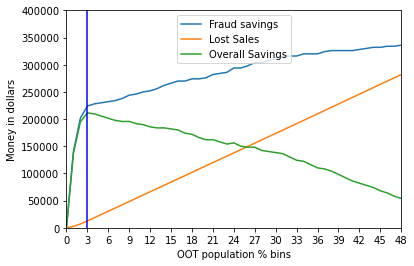

In [46]:
sns.lineplot(x='bin',y='Fraud_savings',data=FDR_oot, label='Fraud savings')
sns.lineplot(x='bin',y='Lost_sales',data=FDR_oot,label='Lost Sales')
sns.lineplot(x='bin',y='Overall_savings',data=FDR_oot, label= 'Overall Savings')
plt.axvline(x = 3, color = 'b', label = 'axvline - full height')
# plt.yaxis.set_major_formatter('${y:1.0f}')
plt.xlim([0, 40])
plt.ylim([0,400000])
plt.ylabel('Money in dollars')
plt.xlabel('OOT population % bins')
plt.xticks(np.arange(0,50,3))
# plt.figure(figsize=(400000,20111))
plt.legend(['Fraud savings','Lost Sales','Overall Savings'], loc='upper center')
plt.show()

In [25]:
print("duration: ", datetime.now() - start_time)

duration:  0:04:47.132435
